In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fig = plt.figure(figsize=(25,6))

num_step = [1,5,10,20,40,60,80,100,120,140,160,180,200]
train_acc = [82.60,81.45,78.95,75.75,89.50,88.55,87.65,88.05,88.85,86.75,86.55,84.60,85.35]
test_acc = [70.47,70.49,69.94,69.85,69.76,69.58,68.08,68.87,69.08,67.55,67.41,67.15,67.34]

plt.subplot(1,4,1)
plt.plot(num_step,train_acc,marker='o')
plt.plot(num_step,test_acc,marker='o')
plt.title('CIFAR-10')
plt.legend(['train_acc','test_acc'])
plt.xlabel('Number of steps per round')
plt.ylabel('Accuracy')


num_step = [1,5,10,20,40,60,80,100,120,140,160,180,200]
train_acc = [99.93,99.83,99.20,96,93.75,93.3,90.2,92,90.30,90.60,90.90,89.80,82.70]
test_acc = [85.94,86.77,86.72,86.18,86.01,86.05,85.3,85.74,85.77,84.83,85.24,85.06,81.64]

plt.subplot(1,4,2)
plt.plot(num_step,train_acc,marker='o')
plt.plot(num_step,test_acc,marker='o')
plt.title('Fashion-product-gender')
plt.legend(['train_acc','test_acc'])
plt.xlabel('Number of steps per round')
plt.ylabel('Accuracy')



num_step = [1,5,10,20,40,60,80,100,120,140,160,180,200]
train_acc = [98.955,99.30,94.12,88.70,84.85,80.25,79.85,77.2,77,77.30,76.10,73.60,74.85]
test_acc = [67.43,69.14,69.32,69.08,68.60,68.49,68.16,67.73,68.65,67.79,67.41,67.01,67.25]

plt.subplot(1,4,3)
plt.plot(num_step,train_acc,marker='o')
plt.plot(num_step,test_acc,marker='o')
plt.title('Fashion-product-season')
plt.legend(['train_acc','test_acc'])
plt.xlabel('Number of steps per round')
plt.ylabel('Accuracy')


num_step = [1,5,10,20,40,60,80,100,120,140,160,180,200]
train_acc = [99.94,99.93,99.94,99.89,99.90,99.35,98.10,94.05,92.20,91.80,91.20,90.85,86.20]
test_acc = [89.30,90.46,90.46,89.81,90.29,89.88,89.36,88.02,87.19,87.84,86.98,86.47,84.92]

plt.subplot(1,4,4)
plt.plot(num_step,train_acc,marker='o')
plt.plot(num_step,test_acc,marker='o')
plt.title('Retina')
plt.legend(['train_acc','test_acc'])
plt.xlabel('Number of steps per round')
plt.ylabel('Accuracy')


plt.savefig('more_epochs.pdf',dpi=800,bbox_inches='tight')


(2000, 8, 2)
(400, 8, 2)
(200, 8, 2)
(100, 8, 2)
(2000,)
(400,)
(200,)
(100,)
(2000,)
(400,)
(200,)
(100,)
(2000,)
(400,)
(200,)
(100,)
(2000,)
(400,)
(200,)
(100,)
(2000,)
(400,)
(200,)
(100,)
(2000,)
(400,)
(200,)
(100,)
(2000,)
(400,)
(200,)
(100,)
(2000,)
(400,)
(200,)
(100,)


/Users/jclialex/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


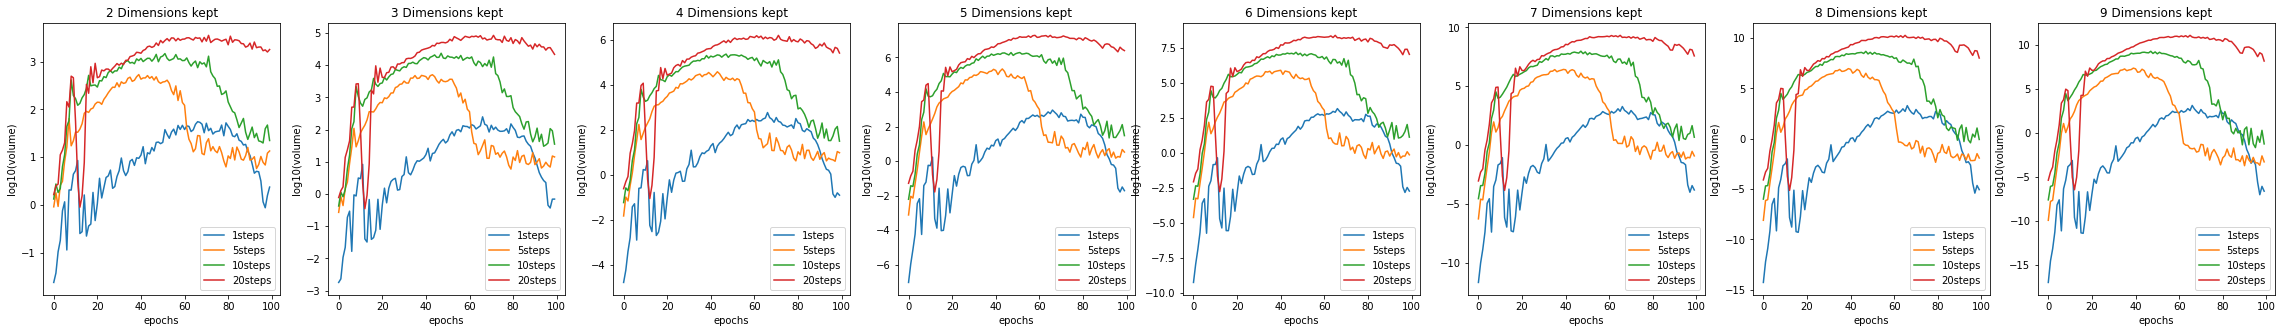

In [3]:

file_prefix = '/Users/jclialex/PycharmProjects/whiteboxmi_expdata/expdata/simplex/'
steps = [1,5,10,20]
const = [20,4,2,1]

all_volume = []
for this_step in steps:
    file_name = file_prefix+f"volume_dim_10_{this_step}_retina_2000_retina.npy"
    all_volume.append(np.load(file_name))
    print (all_volume[-1].shape)
    
all_volume = np.array(all_volume)
#print (all_volume.shape)

fig = plt.figure(figsize=(40,5))
for dim in range(2,10):
    plt.subplot(1,8,dim-1)
    
    for idx,this_step in enumerate(steps):
        this_volume = all_volume[idx][:,dim-2,1]
        print (this_volume.shape)
        selected_index = np.arange(100)*const[idx]
        
        plt.plot(selected_index/const[idx],np.log10(this_volume[selected_index]))
        
    plt.ylabel('log10(volume)')
    plt.xlabel('epochs')
    plt.title(f'{dim} Dimensions kept')
        
    plt.legend([f'{this_step}steps' for this_step in steps])
    
plt.savefig('volume-dimension.pdf',dpi=800,bbox_inches='tight')
        
    
    

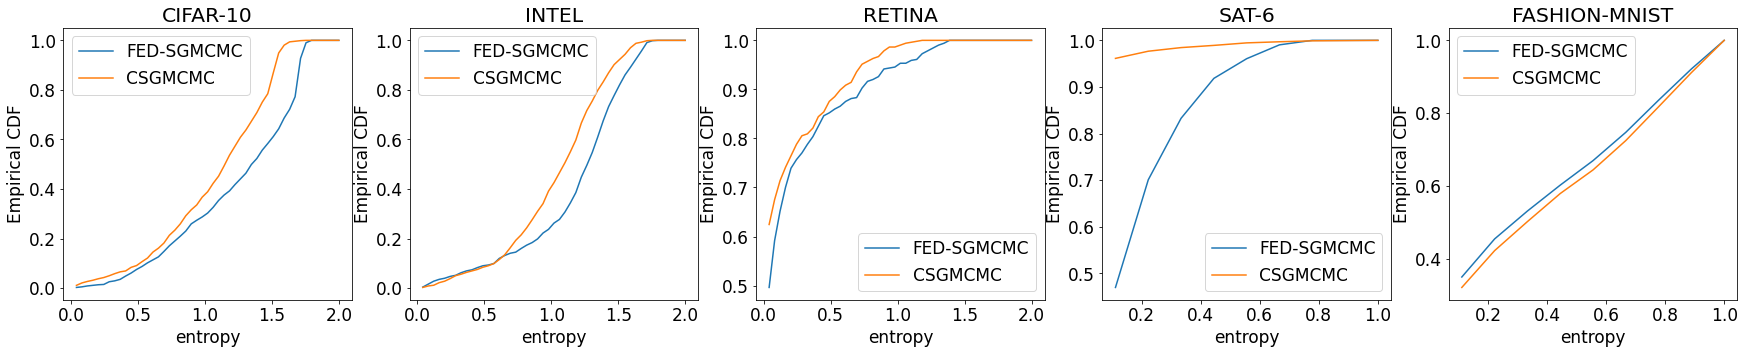

In [8]:
fig = plt.figure(figsize=(30,5))
file_prefix = '/Users/jclialex/PycharmProjects/whiteboxmi_expdata/expdata/simplex/'

plt.rcParams.update({'font.size': 17})
plt.subplot(1,5,1)
fed_uncertainty = np.load(file_prefix+'FED-5round10ensemble_uncertainty_cifar10.npy')
csgmcmc_uncertainty = np.load(file_prefix+'CSGMCMC_uncertainty_cifar10.npy')
bins = np.linspace(0,2,50)
counts,_ = np.histogram(fed_uncertainty,bins)
acc_counts = [counts[0]]
for i in range(1,len(counts)):
    acc_counts.append(acc_counts[-1]+ counts[i])
acc_counts = np.array(acc_counts)
plt.plot(bins[1:],acc_counts/acc_counts[-1])

counts,_ = np.histogram(csgmcmc_uncertainty,bins)
acc_counts = [counts[0]]
for i in range(1,len(counts)):
    acc_counts.append(acc_counts[-1]+ counts[i])
acc_counts = np.array(acc_counts)
plt.plot(bins[1:],acc_counts/acc_counts[-1])

plt.xlabel('entropy')
plt.ylabel('Empirical CDF')
plt.legend(['FED-SGMCMC','CSGMCMC'])
plt.title('CIFAR-10')

plt.subplot(1,5,2)
fed_uncertainty = np.load(file_prefix+'FED-5round10ensemble_uncertainty_intel.npy')
csgmcmc_uncertainty = np.load(file_prefix+'CSGMCMC_uncertainty_intel.npy')
bins = np.linspace(0,2,50)
counts,_ = np.histogram(fed_uncertainty,bins)
acc_counts = [counts[0]]
for i in range(1,len(counts)):
    acc_counts.append(acc_counts[-1]+ counts[i])
acc_counts = np.array(acc_counts)
plt.plot(bins[1:],acc_counts/acc_counts[-1])

counts,_ = np.histogram(csgmcmc_uncertainty,bins)
acc_counts = [counts[0]]
for i in range(1,len(counts)):
    acc_counts.append(acc_counts[-1]+ counts[i])
acc_counts = np.array(acc_counts)
plt.plot(bins[1:],acc_counts/acc_counts[-1])

plt.xlabel('entropy')
plt.ylabel('Empirical CDF')
plt.legend(['FED-SGMCMC','CSGMCMC'])
plt.title('INTEL')

plt.subplot(1,5,3)
fed_uncertainty = np.load(file_prefix+'FED-5round10ensemble_uncertainty_retina.npy')
csgmcmc_uncertainty = np.load(file_prefix+'CSGMCMC_uncertainty_retina.npy')
bins = np.linspace(0,2,50)
counts,_ = np.histogram(fed_uncertainty,bins)
acc_counts = [counts[0]]
for i in range(1,len(counts)):
    acc_counts.append(acc_counts[-1]+ counts[i])
acc_counts = np.array(acc_counts)
plt.plot(bins[1:],acc_counts/acc_counts[-1])

counts,_ = np.histogram(csgmcmc_uncertainty,bins)
acc_counts = [counts[0]]
for i in range(1,len(counts)):
    acc_counts.append(acc_counts[-1]+ counts[i])
acc_counts = np.array(acc_counts)
plt.plot(bins[1:],acc_counts/acc_counts[-1])

plt.xlabel('entropy')
plt.ylabel('Empirical CDF')
plt.legend(['FED-SGMCMC','CSGMCMC'])
plt.title('RETINA')


plt.subplot(1,5,4)
fed_uncertainty = np.load(file_prefix+'FED-5round10ensemble_uncertainty_sat6.npy')
csgmcmc_uncertainty = np.load(file_prefix+'CSGMCMC_uncertainty_sat6.npy')
bins = np.linspace(0,1,10)
counts,_ = np.histogram(fed_uncertainty,bins)
acc_counts = [counts[0]]
for i in range(1,len(counts)):
    acc_counts.append(acc_counts[-1]+ counts[i])
acc_counts = np.array(acc_counts)
plt.plot(bins[1:],acc_counts/acc_counts[-1])

counts,_ = np.histogram(csgmcmc_uncertainty,bins)
acc_counts = [counts[0]]
for i in range(1,len(counts)):
    acc_counts.append(acc_counts[-1]+ counts[i])
acc_counts = np.array(acc_counts)
plt.plot(bins[1:],acc_counts/acc_counts[-1])

plt.xlabel('entropy')
plt.ylabel('Empirical CDF')
plt.legend(['FED-SGMCMC','CSGMCMC'])
plt.title('SAT-6')


plt.subplot(1,5,5)
fed_uncertainty = np.load(file_prefix+'FED-5round10ensemble_uncertainty_fashion_mnist.npy')
csgmcmc_uncertainty = np.load(file_prefix+'CSGMCMC_uncertainty_fashion_mnist.npy')
bins = np.linspace(0,1,10)
counts,_ = np.histogram(fed_uncertainty,bins)
acc_counts = [counts[0]]
for i in range(1,len(counts)):
    acc_counts.append(acc_counts[-1]+ counts[i])
acc_counts = np.array(acc_counts)
plt.plot(bins[1:],acc_counts/acc_counts[-1])

counts,_ = np.histogram(csgmcmc_uncertainty,bins)
acc_counts = [counts[0]]
for i in range(1,len(counts)):
    acc_counts.append(acc_counts[-1]+ counts[i])
acc_counts = np.array(acc_counts)
plt.plot(bins[1:],acc_counts/acc_counts[-1])

plt.xlabel('entropy')
plt.ylabel('Empirical CDF')
plt.legend(['FED-SGMCMC','CSGMCMC'])
plt.title('FASHION-MNIST')



plt.savefig('uncertainty-cdf.pdf',dpi=800,bbox_inches='tight')
